In [1]:
#Read the dataset
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/devesh1093/Hackveda-Casualty-Severity-/main/Accident_Dataset_prepared.csv")
data

,Number of Vehicles,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Victim,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,5,A,3,1,4,1,1,1,36,6
1,5,A,3,1,4,2,1,1,27,6
2,1,Unclassified,2,2,1,3,2,1,68,4
3,2,Unclassified,1,1,1,1,1,1,49,4
4,2,A,2,1,1,1,1,1,33,4
...,...,...,...,...,...,...,...,...,...,...
2659,3,A,2,2,2,2,1,2,4,4
2660,2,A,1,2,1,1,1,2,23,4
2661,2,A,1,2,1,2,1,2,23,4
2662,1,Unclassified,1,2,1,3,1,2,76,4


In [2]:
data.drop("1st Road Class",axis=1,inplace=True)

In [3]:
data.head(3)

,Number of Vehicles,Road Surface,Lighting Conditions,Weather Conditions,Casualty Victim,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,5,3,1,4,1,1,1,36,6
1,5,3,1,4,2,1,1,27,6
2,1,2,2,1,3,2,1,68,4


In [4]:
#Create a Machine Learning model using Lasso LARS Equation 
import sklearn.linear_model as lm

#Select the Lasso LARS Equation 
lr= lm.LassoLars()

#Select Target and Independent Variables
Y= data["Casualty Severity"] # target variable
independent_variable=data.columns
independent_variables = independent_variable.delete(5)
X = data[independent_variables]# Independent variables

In [5]:
#Train the model
lr.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoLars()

In [6]:
#Print the values of trained attributes for prediction
print("Coefficient of determination",lr.coef_)
print("Coefficient path", lr.coef_path_)
print("Intercept", lr.intercept_)
print("Alphas", lr.alphas_)
print("Number of Iterations", lr.n_iter_)

Coefficient of determination [0. 0. 0. 0. 0. 0. 0. 0.]
Coefficient path [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Intercept 1.132882882882883
Alphas [1.]
Number of Iterations 0


In [7]:
#Predict the Casualty using Lasso LARS
Ypred = lr.predict(X)

#Append predicted casualty into data
data["Predicted Casualty Severity"]=Ypred

#Show the new data
data.head(5)


,Number of Vehicles,Road Surface,Lighting Conditions,Weather Conditions,Casualty Victim,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Predicted Casualty Severity
0,5,3,1,4,1,1,1,36,6,1.132883
1,5,3,1,4,2,1,1,27,6,1.132883
2,1,2,2,1,3,2,1,68,4,1.132883
3,2,1,1,1,1,1,1,49,4,1.132883
4,2,2,1,1,1,1,1,33,4,1.132883


Text(0, 0.5, 'Caualty Severity')

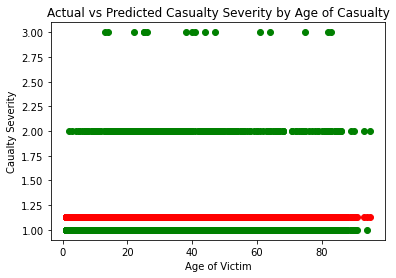

In [8]:
#Plot a Graph between actual values and predicted values
import matplotlib.pyplot as plt
plt.scatter(data["Age of Casualty"],data["Casualty Severity"], color="green")
plt.scatter(data["Age of Casualty"],data["Predicted Casualty Severity"], color= "red")
plt.title("Actual vs Predicted Casualty Severity by Age of Casualty")
plt.xlabel("Age of Victim")
plt.ylabel("Caualty Severity")

In [9]:
#Deploy the model for command line application
accident_case={}
for feature in independent_variables:
  temp=input("Enter"+feature+": ")
  accident_case[feature]=temp

#Create a DataFrame for user_case
user_case=pd.DataFrame(data=accident_case, index=[0],columns= independent_variables)

#Predict the Casualty Severity for this user
casualty= lr.predict(user_case)

#Print the casualty of the victim
print("Casualty severity of the victim is",int(casualty))


EnterNumber of Vehicles: 2
EnterRoad Surface: 1
EnterLighting Conditions: 1
EnterWeather Conditions: 1
EnterCasualty Victim: 1
EnterSex of Casualty: 1
EnterAge of Casualty: 18
EnterType of Vehicle: 4
Casualty severity of the victim is 1
